<a href="https://colab.research.google.com/github/codelspak/Codelion_weekly_projects/blob/main/WK5_Midproject_OECD_%EA%B5%AD%EA%B0%80_%EB%B3%84_%EC%A3%BC%EC%9A%94_%EC%A7%88%EB%B3%91_%EC%82%AC%EB%A7%9D%EC%9E%90_%EB%B0%8F_%EB%B3%B4%EA%B1%B4_%ED%99%98%EA%B2%BD_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 파일 업로드 및 라이브러리 임포트
https://growthj.link/python-%EA%B5%AC%EA%B8%80-colab%EC%9C%BC%EB%A1%9C-pd-read-csv-%ED%99%9C%EC%9A%A9%ED%95%98%EB%8A%94-%EB%B0%A9%EB%B2%95/

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
# #파일 직접 업로드하기
# from google.colab import files
# welfare_data = files.upload()

In [ ]:
# 한글폰트
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux(colab)
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family


# style 설정은 꼭 폰트설정 위에서 합니다.
# style 에 폰트 설정이 들어있으면 한글폰트가 초기화 되어 한글이 깨집니다.
plt.style.use("seaborn")
# 폰트설정
plt.rc("font", family=get_font_family())

# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


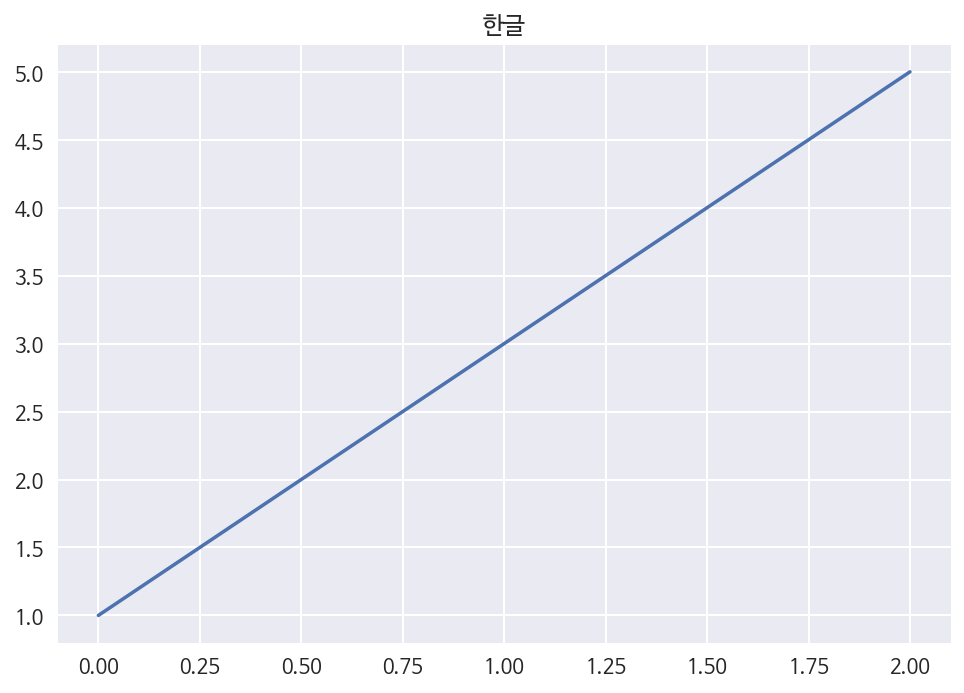

In [ ]:
# 확인
pd.Series([1,3,5]).plot(title = '한글')

# 공통국가 데이터 리스트 

In [ ]:
common_country_list = ['룩셈부르크',  '네덜란드',  '영국',  '이탈리아',  '캐나다',  '오스트레일리아',  '한국',  '일본',  '스페인',  '헝가리',  '독일',  '에스토니아',  '그리스',  '슬로바키아',  '핀란드',  '벨기에',  '체코',  '슬로베니아',  '프랑스',  '스웨덴',  '노르웨이',  '뉴질랜드',  '라트비아',  '덴마크',  '오스트리아',  '포르투갈',  '아일랜드',  '아이슬란드']
len(common_country_list)

28

# 데이터  다운

In [ ]:
#드라이브에 접근할 수 있도록 아래 코드 입력
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
expense_filename = '/content/공공사회복지_지출_20220608224432_분석(전년_대비_증감)_이슬.csv'
insurance_filename = '/content/사회보험부담률_GDP_대비__20220609001721_분석(전년_대비_증감)_이슬2.csv'
sercvice_filename = '/content/drive/MyDrive/보건서비스_지출비_20220609140138_분석(전년_대비_증감).csv'

In [ ]:
#pandas read_csv로 불러오기
welfare_exp = pd.read_csv(expense_filename, encoding = 'cp949')
welfare_exp.head()

,국가별(1),국가별(2),시점,원데이터,전년 대비 증감
0,아시아,소계,1998,NaN,NaN
1,아시아,소계,1999,NaN,NaN
2,아시아,소계,2000,NaN,NaN
3,아시아,소계,2001,NaN,NaN
4,아시아,소계,2002,NaN,NaN


In [ ]:
#pandas read_csv로 불러오기
insu_per_gdp = pd.read_csv(insurance_filename, encoding = 'cp949')
insu_per_gdp.head()

,국가별(1),국가별(2),시점,원데이터,전년 대비 증감
0,아시아,소계,1998,NaN,NaN
1,아시아,소계,1999,NaN,NaN
2,아시아,소계,2000,NaN,NaN
3,아시아,소계,2001,NaN,NaN
4,아시아,소계,2002,NaN,NaN


In [ ]:
#pandas read_csv로 불러오기
service_exp = pd.read_csv(sercvice_filename, encoding = 'cp949')
service_exp.head()

,국가별(1),국가별(2),항목,시점,원데이터,전년 대비 증감
0,아시아,소계,보건 당기 지출,1998,NaN,NaN
1,아시아,소계,보건 당기 지출,1999,NaN,NaN
2,아시아,소계,보건 당기 지출,2000,NaN,NaN
3,아시아,소계,보건 당기 지출,2001,NaN,NaN
4,아시아,소계,보건 당기 지출,2002,NaN,NaN


In [ ]:
cols1 = ['대륙', '국가','연도', '값', '전년대비증감']
cols2 = ['대륙', '국가','항목구분', '연도', '값', '전년대비증감']
welfare_exp.columns = cols1
insu_per_gdp.columns = cols1
service_exp.columns = cols2

In [ ]:
# 각 데이터 '공통국가여부' 컬럼 추가
welfare_exp.loc[welfare_exp['국가'].isin(common_country_list), '공통국가여부'] = '공통'
insu_per_gdp.loc[insu_per_gdp['국가'].isin(common_country_list), '공통국가여부'] = '공통'
service_exp.loc[service_exp['국가'].isin(common_country_list), '공통국가여부'] = '공통'

welfare_exp.shape, insu_per_gdp.shape, service_exp.shape, 

((893, 6), (966, 6), (5868, 7))

In [ ]:
welfare_exp['공통국가여부'].unique(), insu_per_gdp['공통국가여부'].unique(), service_exp['공통국가여부'].unique()

(array([nan, '공통'], dtype=object),
 array([nan, '공통'], dtype=object),
 array([nan, '공통'], dtype=object))

In [ ]:
welfare_exp['공통국가여부'] = welfare_exp['공통국가여부'].fillna('해당아님')
insu_per_gdp['공통국가여부'] = insu_per_gdp['공통국가여부'].fillna('해당아님')
service_exp['공통국가여부'] = service_exp['공통국가여부'].fillna('해당아님')

# 제대로 할당되었는지 확인
welfare_exp['공통국가여부'].unique()
#  insu_per_gdp['공통국가여부'].isnull().unique(), service_exp['공통국가여부'].isnull().unique()

array(['해당아님', '공통'], dtype=object)

In [ ]:
# 컬럼 순서 변경
cols1 = ['대륙', '국가','공통국가여부','연도', '값', '전년대비증감']
cols2 = ['대륙', '국가','공통국가여부','항목구분', '연도', '값', '전년대비증감']
welfare_exp = welfare_exp[cols1]
insu_per_gdp = insu_per_gdp[cols1]
service_exp = service_exp[cols2]

In [ ]:
welfare_exp.sample(3)

,대륙,국가,공통국가여부,연도,값,전년대비증감
7,아시아,소계,해당아님,2005,NaN,NaN
856,오세아니아,오스트레일리아,공통,2002,17.3,-0.2
881,오세아니아,뉴질랜드,공통,2007,18.5,-0.3


In [ ]:
insu_per_gdp.sample(3)

,대륙,국가,공통국가여부,연도,값,전년대비증감
906,오세아니아,오스트레일리아,공통,2003,0.0,0.0
632,유럽,룩셈부르크,공통,2015,10.4,0.1
172,북아메리카,멕시코,해당아님,2017,2.1,0.0


In [ ]:
service_exp.sample(3)

,대륙,국가,공통국가여부,항목구분,연도,값,전년대비증감
3663,유럽,리투아니아,해당아님,치료 및 재활 치료,2007,875.0,131.0
4882,유럽,스페인,공통,보건 보조 서비스,2000,382.0,29.0
3056,유럽,헝가리,공통,치료 및 재활 치료,2009,921302.0,-20637.0


# 데이터 EDA

## 공공사회복지 지출비용 EDA

In [ ]:
df_welfare = welfare_exp.copy()
df_welfare.shape == welfare_exp.shape

True

In [ ]:
df_welfare.shape

(893, 6)

In [ ]:
df_welfare.sample(5)

,대륙,국가,공통국가여부,연도,값,전년대비증감
732,유럽,슬로베니아,공통,2009,22.4,2.5
234,남아메리카,칠레,해당아님,2015,10.9,0.5
764,유럽,스페인,공통,2019,24.7,0.5
125,북아메리카,소계,해당아님,2015,NaN,NaN
108,북아메리카,소계,해당아님,1998,NaN,NaN


In [ ]:
# 결측치 탐구
df_welfare.isnull().sum()

대륙        0
국가        0
공통국가여부    0
연도        0
값         0
전년대비증감    0
dtype: int64

In [ ]:
df_wel_na = df_welfare.loc[df_welfare['전년대비증감'].isnull(), ['국가', '값','전년대비증감']]
df_wel_na['국가'].value_counts()

소계       110
에스토니아      1
헝가리        1
Name: 국가, dtype: int64

In [ ]:
# 소계 결측치 비율 확인
df_welfare[df_welfare['국가'] == '소계'].isnull().mean() # 1.0

대륙        0.0
국가        0.0
공통국가여부    0.0
연도        0.0
값         1.0
전년대비증감    1.0
dtype: float64

In [ ]:
# 에스토니아, 헝가리 (전년증감) 결측치 탐구
df_welfare[
           (df_welfare['전년대비증감'].isnull()) & (df_welfare['국가'].isin(['에스토니아','헝가리']))
]

,대륙,국가,공통국가여부,연도,값,전년대비증감
349,유럽,에스토니아,공통,1999,15.2,NaN
458,유럽,헝가리,공통,1999,20.9,NaN


In [ ]:
# 결론 : 소계 삭제 / 전년대비 증감 NaN -fillna
# df_welfare['전년대비증감'].fillna(0).isnull().sum()
df_welfare['전년대비증감'] = df_welfare['전년대비증감'].fillna(0)
df_welfare = df_welfare.dropna(how = 'any')
df_welfare.isnull().sum()

대륙        0
국가        0
공통국가여부    0
연도        0
값         0
전년대비증감    0
dtype: int64

In [ ]:
# 중복 확인
df_welfare.duplicated().sum() # 없음

0

In [ ]:
# 기술통계
df_welfare.describe()

,연도,값,전년대비증감
count,783.000000,783.000000,783.000000
mean,2008.435504,19.372925,0.105236
std,6.288309,5.833820,0.858468
min,1998.000000,3.800000,-4.800000
25%,2003.000000,15.800000,-0.300000
50%,2008.000000,19.300000,0.000000
75%,2014.000000,23.800000,0.400000
max,2019.000000,32.000000,5.300000


In [ ]:
df_welfare.describe(include = 'object')

,대륙,국가,공통국가여부
count,783,783,783
unique,5,36,2
top,유럽,한국,공통
freq,569,22,608


In [ ]:
569 / len(df_welfare.loc[df_welfare['대륙']=='유럽', '국가'].unique())
# 유럽은 그냥 국가가 많아서 그런걸로

21.884615384615383

In [ ]:
# df_welfare

## 사회보험부담률(GDP대비) EDA

In [ ]:
df_insurance = insu_per_gdp.copy()
df_insurance.shape == insu_per_gdp.shape

True

In [ ]:
df_insurance.shape

(966, 6)

In [ ]:
df_insurance.isnull().sum()
# 값, 전년대비 증감 132개 똑같은지 확인

대륙          0
국가          0
공통국가여부      0
연도          0
값         132
전년대비증감    132
dtype: int64

In [ ]:
df_insurance.loc[df_insurance['값'].isnull(), '전년대비증감'].isnull().sum() # 132 
# 값들이 소계인지 확인
df_insurance.loc[df_insurance['값'].isnull(), '국가'].unique() # 다 소계임

array(['소계'], dtype=object)

In [ ]:
# 소계 - 결측치 비율 확인하고 지워줄거야
df_insurance.loc[df_insurance['국가']=='소계', '값'].isnull().mean() 
# 0.86 : 결측치만 지우기보다는 소계 자체를 지워줘야 함

0.8571428571428571

In [ ]:
# 소계만 삭제해 줄 거라 index 반환
index_sg = df_insurance.index[df_insurance['국가']=='소계'].tolist()
df_insurance = df_insurance.drop(index = index_sg)
df_insurance.isnull().sum()

대륙        0
국가        0
공통국가여부    0
연도        0
값         0
전년대비증감    0
dtype: int64

In [ ]:
df_insurance.describe()

,연도,값,전년대비증감
count,812.000000,812.000000,812.000000
mean,2008.474138,7.965148,0.014901
std,6.334535,5.406976,0.528928
min,1998.000000,0.000000,-9.200000
25%,2003.000000,3.475000,-0.100000
50%,2008.000000,7.750000,0.000000
75%,2014.000000,12.100000,0.100000
max,2019.000000,24.300000,3.000000


In [ ]:
df_insurance.describe(include = 'object')

,대륙,국가,공통국가여부
count,812,812,812
unique,5,37,2
top,유럽,한국,공통
freq,572,22,614


In [ ]:
set(df_insurance[df_insurance['국가']=='한국']['연도'].unique()) == set(df_insurance[df_insurance['국가']=='미국']['연도'].unique())
# ?

True

## 보건서비스 지출비 EDA

In [ ]:
df_service = service_exp.copy()
df_service.shape == service_exp.shape

True

In [ ]:
df_service.shape

(5868, 7)

In [ ]:
df_service.isnull().sum()
# 값, 전년대비 증감 132개 똑같은지 확인

대륙           0
국가           0
공통국가여부       0
항목구분         0
연도           0
값          966
전년대비증감    1109
dtype: int64

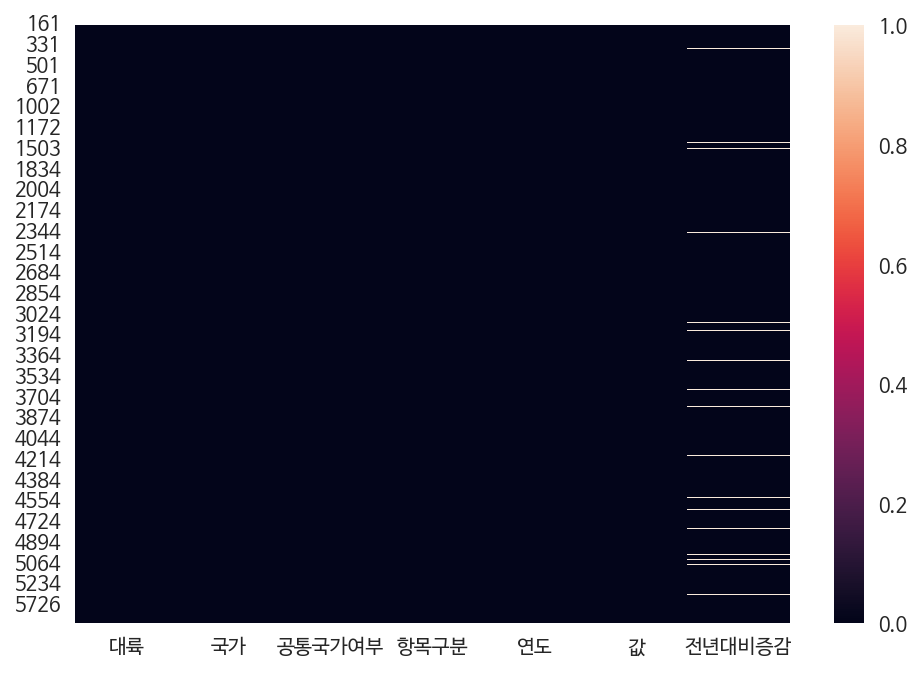

In [ ]:
sns.heatmap(df_service.isnull())

In [ ]:
df_service.loc[df_service['값'].isnull(), '전년대비증감'].isnull().sum() # 966 means 값이 na인 애들은 전년대비 증감도 다 na
# 값들이 소계인지 확인
df_service.loc[df_service['값'].isnull(), '국가'].unique() # 다 소계임

array(['소계'], dtype=object)

In [ ]:
# 그럼 전년대비증감이 na인 애들은 다 소계인지 확인
df_service.loc[(df_service['전년대비증감'].isnull()) & (df_service['국가']!='소계'),'연도' ].unique()
df_service.loc[(df_service['전년대비증감'].isnull()) & (df_service['국가']!='소계'),'연도' ].value_counts().sort_values(ascending = False)

1999    24
2000    21
2004    20
2003    15
2002    14
2013    12
2011    12
1998    11
2001     5
2014     5
2012     3
2015     1
Name: 연도, dtype: int64

In [ ]:
df_service.loc[(df_service['전년대비증감'].isnull()) & (df_service['국가']!='소계'),'국가' ].unique()

array(['중국', '인도', '인도네시아', '이스라엘', '터키', '멕시코', '칠레', '콜롬비아', '코스타리카',
       '벨기에', '체코', '덴마크', '에스토니아', '그리스', '헝가리', '아이슬란드', '아일랜드', '이탈리아',
       '라트비아', '리투아니아', '룩셈부르크', '노르웨이', '폴란드', '포르투갈', '러시아', '슬로바키아',
       '슬로베니아', '스웨덴', '영국', '남아프리카공화국', '오스트레일리아', '뉴질랜드'], dtype=object)

In [ ]:
df_service.loc[(df_service['전년대비증감'].isnull()) & (df_service['국가']!='소계'),'항목구분' ].unique()

array(['보건 당기 지출', '의료품', '치료 및 재활 치료', '보건 보조 서비스', '예방치료',
       '정부의료체계 및 재정행정', '장기 치료'], dtype=object)

In [ ]:
# 아래 셀 결측치 탐구하다가 이상한 거 발견함. 
df_service['항목구분'].unique()

array(['보건 당기 지출', '치료 및 재활 치료', '장기 치료', '보건 보조 서비스', '의료품', '예방치료',
       '정부의료체계 및 재정행정'], dtype=object)

In [ ]:
df_ser_na = df_service.loc[(df_service['전년대비증감'].isnull()) & (df_service['국가']!='소계'),['항목구분','국가','연도'] ]
df_ser_na.groupby(by = ['항목구분','국가','연도'])['항목구분'].count()

항목구분        국가        연도  
보건 당기 지출    남아프리카공화국  2000    1
            라트비아      2000    1
            러시아       2000    1
            리투아니아     2000    1
            멕시코       1999    1
                             ..
치료 및 재활 치료  콜롬비아      2013    1
            터키        1999    1
            포르투갈      2000    1
            폴란드       2002    1
            헝가리       1998    1
Name: 항목구분, Length: 143, dtype: int64

In [ ]:
# 소계 - 결측치 비율 확인하고 지워줄거야
df_service.loc[df_service['국가']=='소계', '값'].isnull().mean() # 1.0

1.0

In [ ]:
# 소계 다 지워주고 (그냥 코드 통일시킨거임) 
index_service_sg = df_service.index[df_service['국가']=='소계'].tolist()
df_service = df_service.drop(index = index_service_sg)
df_service.isnull().sum()

대륙          0
국가          0
공통국가여부      0
항목구분        0
연도          0
값           0
전년대비증감    143
dtype: int64

In [ ]:
# 저 전년대비증감 데이터 빠진 애들!
# 1) 왜 빠졌을지
# 2) 그리고 어떻게 결측치 보완할지 시각화 통해 확인하면서 볼 거임!

In [ ]:
df_service.describe()

,연도,값,전년대비증감
count,4902.000000,4.902000e+03,4.759000e+03
mean,2009.370665,2.247485e+06,1.849108e+05
std,6.171882,1.673382e+07,1.690116e+06
min,1998.000000,0.000000e+00,-6.097400e+05
25%,2004.000000,1.660750e+03,2.900000e+01
50%,2010.000000,1.174550e+04,4.300000e+02
75%,2015.000000,8.498550e+04,3.961500e+03
max,2020.000000,4.255832e+08,4.684284e+07


In [ ]:
df_service.describe(include = 'object')

,대륙,국가,공통국가여부,항목구분
count,4902,4902,4902,4902
unique,6,43,2,7
top,유럽,한국,공통,보건 당기 지출
freq,3625,161,3825,934


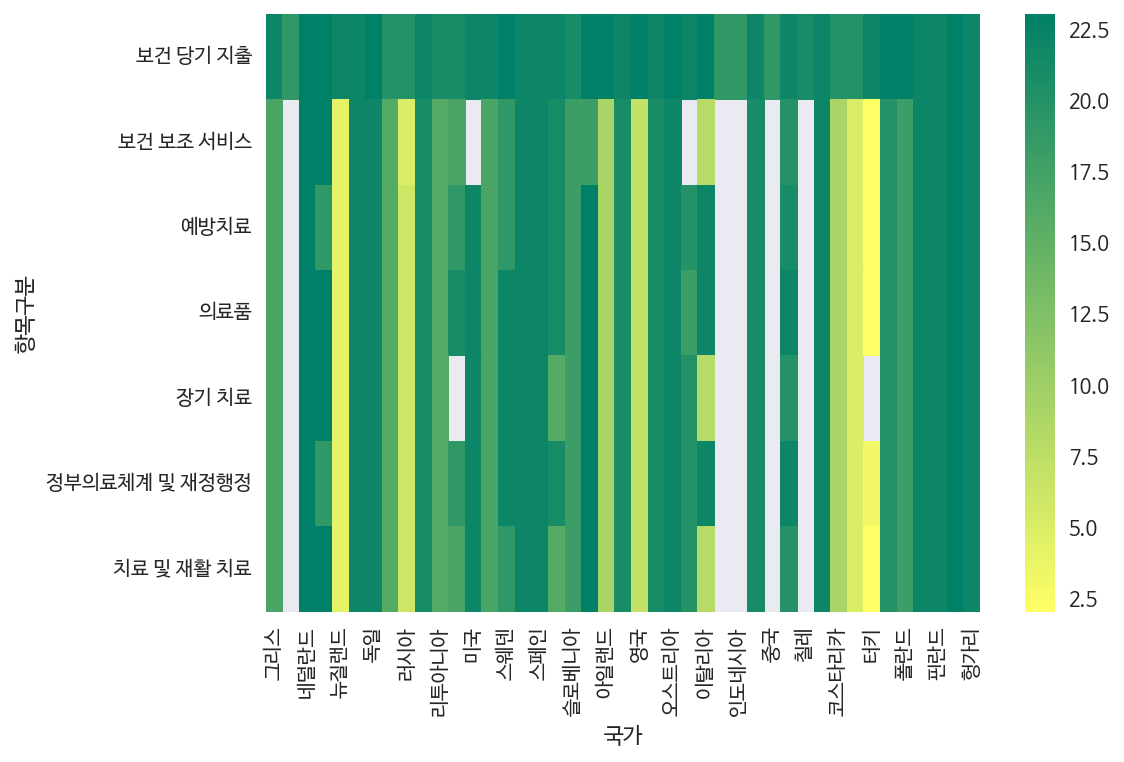

In [ ]:
cross_country = pd.crosstab(index = df_service['항목구분'], columns = df_service['국가'], values = df_service['값'], aggfunc = 'count')
_ = sns.heatmap(cross_country, cmap = 'summer_r', annot = False)

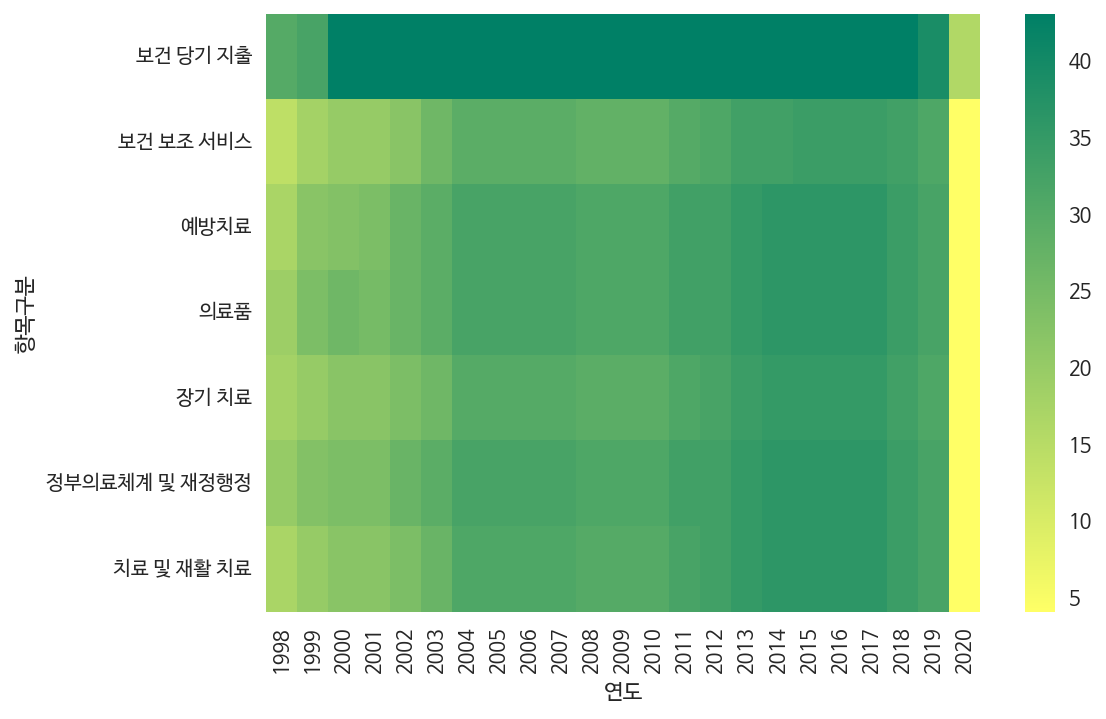

In [ ]:
cross_year = pd.crosstab(index = df_service['항목구분'], columns = df_service['연도'], values = df_service['값'], aggfunc = 'count')
_ = sns.heatmap(cross_year, cmap = 'summer_r', annot = False)

# 분석 및 시각화

In [ ]:
# 일단 데이터 형태 다시 확인
df_welfare.sample(2)

,대륙,국가,공통국가여부,연도,값,전년대비증감
678,유럽,포르투갈,공통,1999,17.2,0.4
339,유럽,덴마크,공통,2010,29.6,0.4


## 국가 별 공공사회복지비용 - 연도 별 
    1. 전체 국가
    2. 공통 국가
    3. 대륙 별
    4.  + 전년대비 증감

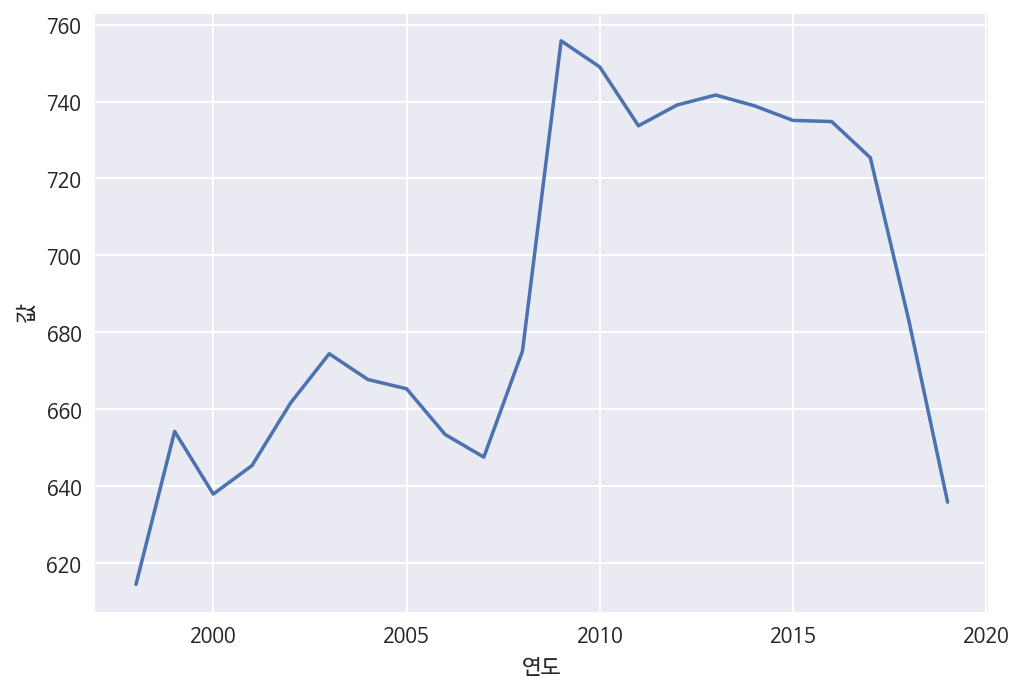

In [ ]:
#  title = '연도 별 공공사회복지비용 - 전세계 총액'
_ = sns.lineplot(data = df_welfare, x = '연도', y = '값', estimator = np.sum, ci = None, )

In [ ]:
#  title = '연도 별 공공사회복지비용 - 국가별'
# _ = sns.lineplot(data = df_welfare, x = '연도', y = '값', hue = '국가', estimator = np.sum, ci = None, )
px.line(data_frame = df_welfare, x = '연도', y = '값', color = '국가',
            title = '연도 별 공공사회복지비용 - 국가별',  )

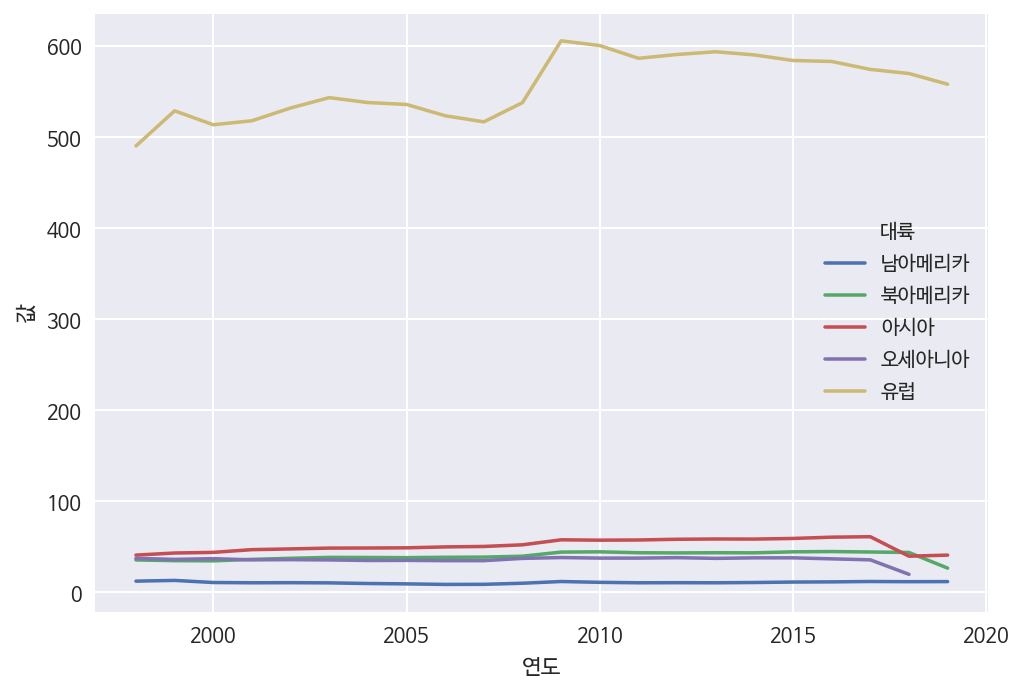

In [ ]:
#  title = '연도 별 공공사회복지비용 - 대륙별'
# _ = sns.lineplot(data = df_welfare, x = '연도', y = '값', hue = '국가', estimator = np.sum, ci = None, )
df_cont = df_welfare.groupby(by = ['연도','대륙'], as_index = False)['값'].sum()
_ = sns.lineplot(data = df_cont, x = '연도', y = '값', hue = '대륙')

In [ ]:
# 이상해서 연도별 데이터 수 / 값의 총합 확인해봄
# 1. 2007-8년 전후로 확 증가하는 이유: 
# 2. 2013년 기점으로 다시 감소하는 이유:
# 3. 2018-19년 폭락 이유: 
#   - 데이터 수집량 자체는 두 세 국가밖에 차이 안 남 : 근데 걔네가 희대의 복지국가들인 게 문제야 
#   - 분석 결과 메인 요인이 데이터 수집 국가 차이 기인임
df_welfare.groupby(by = '연도').count() 


,대륙,국가,공통국가여부,값,전년대비증감
연도,,,,,
1998,34,34,34,34,34
1999,36,36,36,36,36
2000,36,36,36,36,36
2001,36,36,36,36,36
2002,36,36,36,36,36
2003,36,36,36,36,36
2004,36,36,36,36,36
2005,36,36,36,36,36
2006,36,36,36,36,36


In [ ]:
# 17-> 18년도 제외 국가
set(df_welfare.loc[df_welfare['연도']==2017, '국가'].unique()) - set(df_welfare.loc[df_welfare['연도']==2018, '국가'].unique())

{'오스트레일리아', '일본'}

In [ ]:
# 17 - 18년도 감소 총액
sum_2017 = df_welfare.loc[df_welfare['연도']==2017, '값'].sum() 
sum_2018 = df_welfare.loc[df_welfare['연도']==2018, '값'].sum() 
sum_2017 - sum_2018

42.500000000000114

In [ ]:
# 해당 두 나라 총 비용
aus_jp_2017 = df_welfare.loc[(df_welfare['연도']==2017) & (df_welfare['국가'].isin(['오스트레일리아', '일본'])),'값'].sum()
aus_jp_2017

39.0

In [ ]:
# 17 - 18년도 감소 총액 대비 비율
aus_jp_2017 / (sum_2017- sum_2018) * 100

91.76470588235269

In [ ]:
# 저 두 나라 비중 : 17년도 전체 5퍼밖에 안 되지만, 감소액 전체의 90% 차지함 : 약간의 외부요인은 존재하겠지만 그래프 변화는 그냥 국가의 차이다
aus_jp_2017 / sum_2017 * 100

5.376344086021505

In [ ]:
# 18 - 19년도 제외 국가
set(df_welfare.loc[df_welfare['연도']==2018, '국가'].unique()) - set(df_welfare.loc[df_welfare['연도']==2019, '국가'].unique())


{'뉴질랜드', '스위스', '캐나다'}

In [ ]:
# 18 - 19년도 감소 총액
sum_2019 = df_welfare.loc[df_welfare['연도']==2019, '값'].sum() 
sum_2018 - sum_2019

47.099999999999795

In [ ]:
# 해당 세 나라 총 비용
nz_swit_ca_2018 = df_welfare.loc[(df_welfare['연도']==2018) & (df_welfare['국가'].isin(['뉴질랜드', '스위스', '캐나다'])),'값'].sum()
nz_swit_ca_2018

54.1

In [ ]:
# 18 - 19년도 감소 총액 대비 비율
nz_swit_ca_2018 / (sum_2018- sum_2019) * 100


114.861995753716

In [ ]:
# 저 세 나라 비중 : 18년도 전체 8퍼밖에 안 되지만, 감소액 총액보다 많음 : 
# 이 말은, 감소액은 순전히 세 복지국가를 제외하면서 생긴 변화고. 오히려 다른 나라 혹은 외부 요인에서 증가 요인이 존재한다는 것.# 약간 코로나 생각하면 늘 법함 근데
nz_swit_ca_2018 / sum_2018 * 100


7.922096939522624

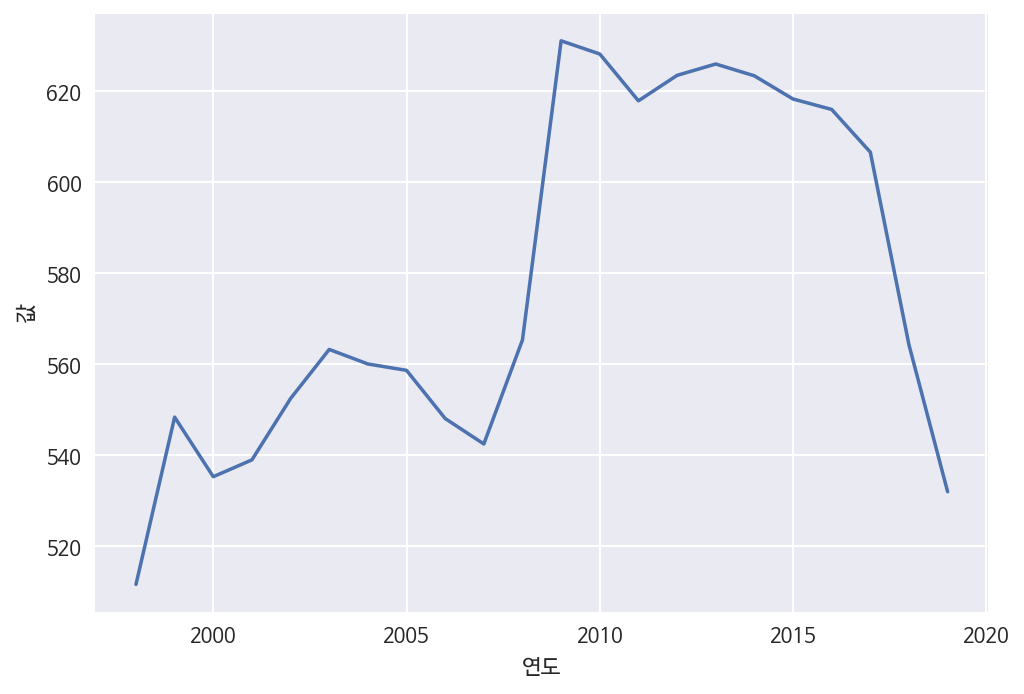

In [ ]:
#  title = '연도 별 공공사회복지비용 - 공통국가 대상 총액'
_ = sns.lineplot(data = df_welfare[df_welfare['공통국가여부']=='공통'], x = '연도', y = '값', estimator = np.sum, ci = None, )

In [ ]:
# 그럼 공통국가가 ['오스트레일리아', '일본', '캐나다', '뉴질랜드', '스위스'] 얼마나 포함함? 
len(common_country_list), len(common_country_list)-len(['오스트레일리아', '일본', '캐나다', '뉴질랜드', '스위스'])
# 오 다 포함함. 그럼 비슷한 추세를 보이는 게 이유가 설명됨.

(28, 23)

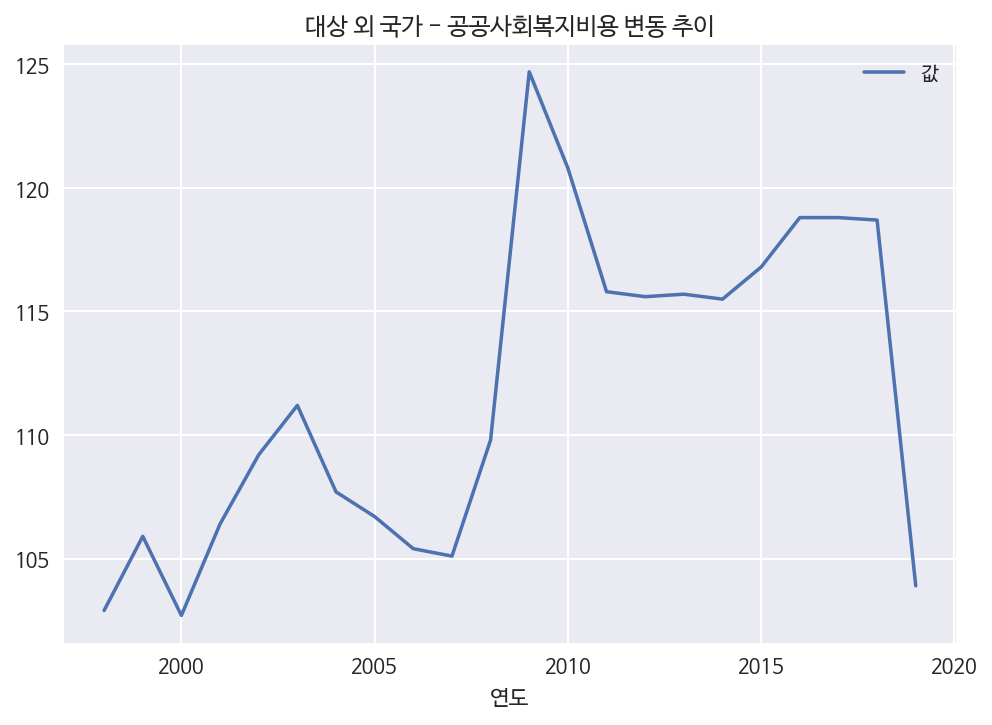

In [ ]:
sum_global = pd.DataFrame(df_welfare.groupby(by = '연도')['값'].sum())
sum_common = pd.DataFrame(df_welfare[df_welfare['공통국가여부']=='공통'].groupby(by = '연도')['값'].sum())
(sum_global - sum_common).plot(title = '대상 외 국가 - 공공사회복지비용 변동 추이')
# 이상한 건, 세 개 추이가 모두 비슷함 + 예상 밖의 모습을 띄고 있음! 

## GDP 대비 사회보험부담률

In [ ]:
df_insurance.sample(2)

,대륙,국가,공통국가여부,연도,값,전년대비증감
929,오세아니아,뉴질랜드,공통,2005,0.0,0.0
696,유럽,폴란드,해당아님,2013,12.2,0.3


In [ ]:
# 음 사회보험부담률 낮음 > 의료 서비스에 대한 부담감이 높아질 수 있음(ex.미국 - 얘는 민영화긴하지만 쨌든) > 
# 보험부담율 데이터로 뭘 할 수 있을까, 생각해봤을 때 : 국가 별로 공공사회복지비용이랑 비슷한 추세를 가지는지 확인해보는 걸로 그치지 않을까

In [ ]:
px.line(data_frame = df_insurance[df_insurance['공통국가여부']=='공통'], x = '연도', y = '값', color = '국가',)


In [ ]:
# 나 약간, y: 총액 / secondary_y : 부담률 그려보고 싶음
print("https://codetorial.net/matplotlib/two_types_of_graphs.html")

https://codetorial.net/matplotlib/two_types_of_graphs.html


In [ ]:
# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (4, 3)
plt.rcParams['font.size'] = 12

In [ ]:
# # 2. 데이터 준비
# target_country = '한국'
# x = pd.Series(df_welfare['연도'])
# y1 = df_insurance.loc[df_insurance['국가'] == target_country, '값'] # 라인 : 비율 - 보험보장
# y2 = df_welfare.loc[df_welfare['국가'] == target_country, '값'] # 막대 : 값

In [ ]:
# # 3. 그래프 그리기
# fig, ax1 = plt.subplots()

# ax1.plot(x, y1, '-s', color='green', markersize=7, linewidth=5, alpha=0.7, label='사회보험보장 비율') # y1데이터 꺾은 선 그래프 표현
# ax1.set_ylim(0, 18)
# ax1.set_xlabel('Year')
# ax1.set_ylabel('비율 (%)')
# ax1.tick_params(axis='both', direction='in')

# ax2 = ax1.twinx() # x축을 공유하는 이중y축 만듦
# ax2.bar(x, y2, color='deeppink', label='공공사회복지 비용', alpha=0.7, width=0.7) # y1데이터 막대 그래프 표현
# ax2.set_ylim(0, 18)
# ax2.set_ylabel(r'비용')
# ax2.tick_params(axis='y', direction='in')

# plt.show()

## 사회복지서비스 비용

In [ ]:
df_service.sample(2)

,대륙,국가,공통국가여부,항목구분,연도,값,전년대비증감
1806,유럽,오스트리아,공통,의료품,2007,4922.0,345.0
2638,유럽,프랑스,공통,장기 치료,2002,14857.0,1745.0
